# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>

Regresi pada dataset Abalone menggunakan k-Nearest Neighbor

<b>Kelompok: 8</b>

Anggota:
1. MUHAMMAD HILAL ABYAN - 1301223262
2. NAILA ATHAYA MUMTAZ - 1301223281
3. HANUM FADIANNUR - 1301223380

#### Pendahuluan
**DATASET INTRODUCTION**

Dataset yang kelompok kami pilih adalah data tentang ukuran fisik Abalone terdiri dari:
1. Sex - M (Male), F (Female), and I (infant)
2. Length - Longest shell measurement
3. Diameter - perpendicular to length
4. Height - with meat in shell
5. Whole weight - whole abalone
6. Shucked weight - weight of meat
7. Viscera weight - gut weight (after bleeding)
8. Shell weight - after being dried
Sebagai Independent Attribute dan
9. Rings - +1.5 gives the age in years
Sebagai Dependent Attribute

**MASALAH YANG AKAN DISELESAIKAN**

Permasalahan yang dihadapi adalah untuk menentukan umur abalon dilakukan dengan cara memotong cangkang melalui kerucut, mewarnainya, dan menghitung jumlah cincin melalui mikroskop. Hal ini merupakan kegiatan yang memakan banyak waktu. Dengan menggunakan data pengukuran fisik abalon, kita dapat memprediksi umur abalon.

**DATASET SPLITTING**

Pembagian data dilakukan dengan membagi dataset menjadi data training dan data test dengan ukuran data training adalah 80% dari jumlah dataset dan data test adalah 20% data sisanya.

**DATA PREPROCESSING**

Pengolahan data yang akan dilakukan adalah:
*   Melihat korelasi antar nilai features dengan target
*   Memilih feature yang sesuai untuk model
*   Menangani nilai outlier
*   Melakukan normalisasi data
*   Mengecek apakah terdapat missing value atau NaN



**Import Dataset**

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Melakukan import dataset
from ucimlrepo import fetch_ucirepo

abalone = fetch_ucirepo('Abalone')
print(abalone)

{'data': {'ids': None, 'features':      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  


In [9]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import Normalizer

**Data Exploration**

In [12]:
# Show your data in tabular or other visualization ways
data = abalone.data.original
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**ENCODING KOLOM SEX MENJADI M = 0, F = 1, I = 2**

Komputer hanya dapat menerima sebuah angka dalam melakukan perhitungan, sehingga kolom yang bertipe object atau string harus diencode. Pada dataset abalone, kolom yang bertipe object adalah kolom sex.

In [15]:
# Mengubah data pada column Sex menjadi numerik
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
# Menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [19]:
# Menampilkan deskripsi data
data.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [21]:
# Menampilkan korelasi antar data
data.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [23]:
# Melihat korelasi data feature dengan data target dan disorting menaik
data.corr()['Rings'].sort_values()

Sex              -0.351822
Shucked_weight    0.420884
Viscera_weight    0.503819
Whole_weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell_weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [25]:
# Menghapus data dengan korelasi dibawah 0.5
data = data.drop(['Sex', 'Shucked_weight'], axis=1)

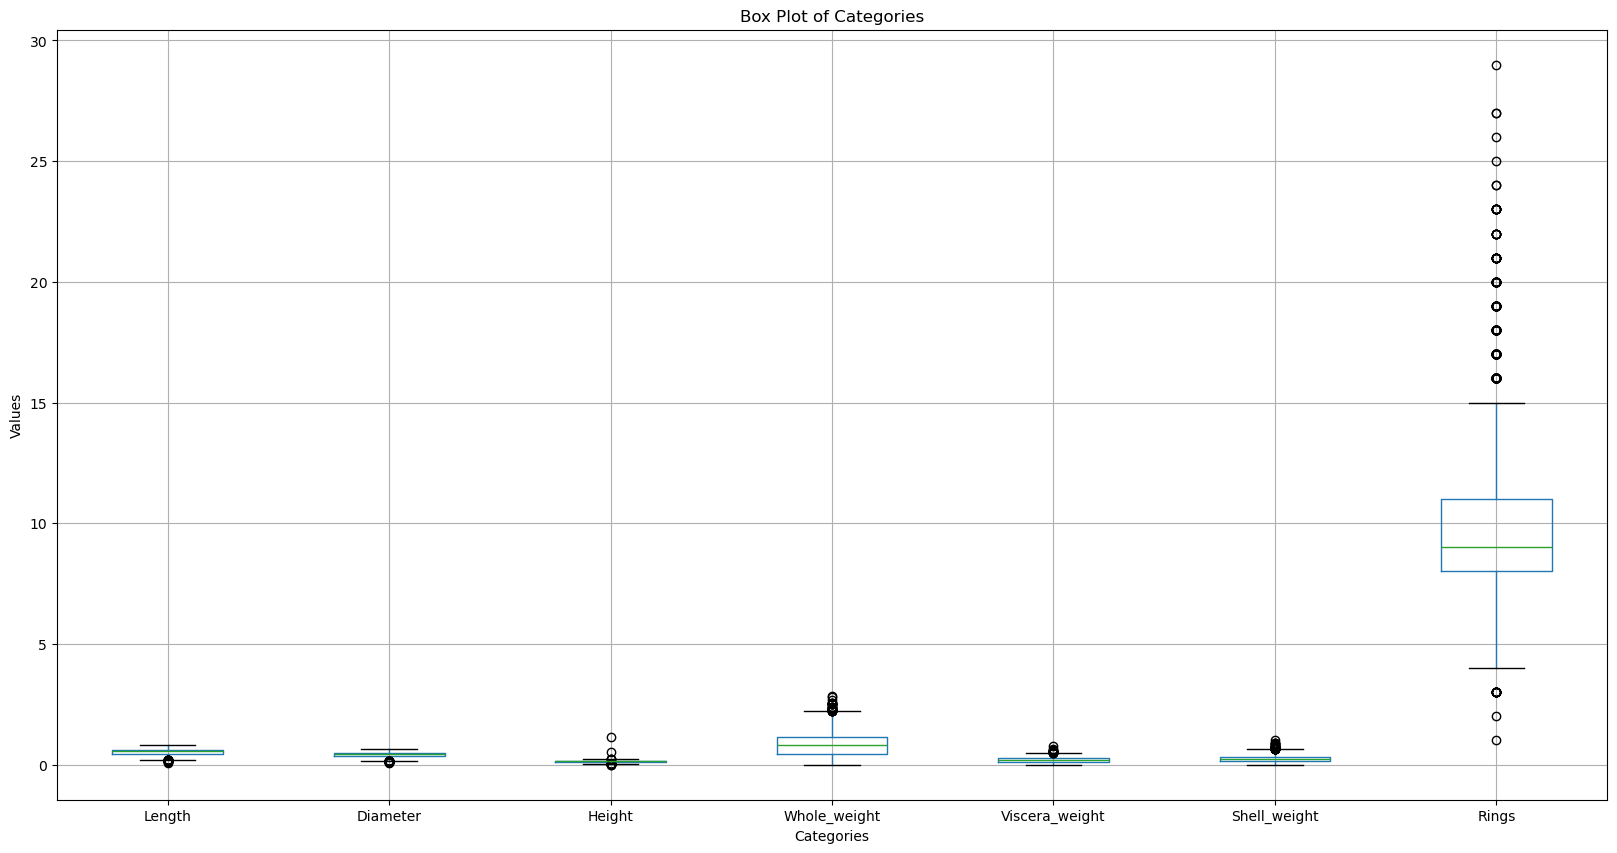

In [27]:
# Menampilkan boxplot untuk setiap kolom
plt.figure(figsize=(20, 10))
data.boxplot()
plt.title('Box Plot of Categories')
plt.ylabel('Values')
plt.xlabel('Categories')
plt.show()

In [29]:
# Mendeteksi outlier pada setiap kolom dan mengganti nilai tersebut
# menjadi Q1 atau Q3 untuk setiap kolom
df_numeric = data.select_dtypes(include=[float, int])
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def replace_outliers(column):
    col_name = column.name
    column = column.copy()
    column[column < lower_bound[col_name]] = lower_bound[col_name]
    column[column > upper_bound[col_name]] = upper_bound[col_name]
    return column
df_no_outliers = df_numeric.apply(replace_outliers)

/var/folders/7f/m1lv8sdx141fznccvwmrsv3w0000gn/T/ipykernel_1964/578394311.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column[column < lower_bound[col_name]] = lower_bound[col_name]


In [31]:
# Menyalin nilai dataframe tanpa outlier ke variabel data
data = df_no_outliers.copy()
data

,Length,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.1010,0.1500,15.0
1,0.350,0.265,0.090,0.2255,0.0485,0.0700,7.0
2,0.530,0.420,0.135,0.6770,0.1415,0.2100,9.0
3,0.440,0.365,0.125,0.5160,0.1140,0.1550,10.0
4,0.330,0.255,0.080,0.2050,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.2390,0.2490,11.0
4173,0.590,0.440,0.135,0.9660,0.2145,0.2605,10.0
4174,0.600,0.475,0.205,1.1760,0.2875,0.3080,9.0
4175,0.625,0.485,0.150,1.0945,0.2610,0.2960,10.0


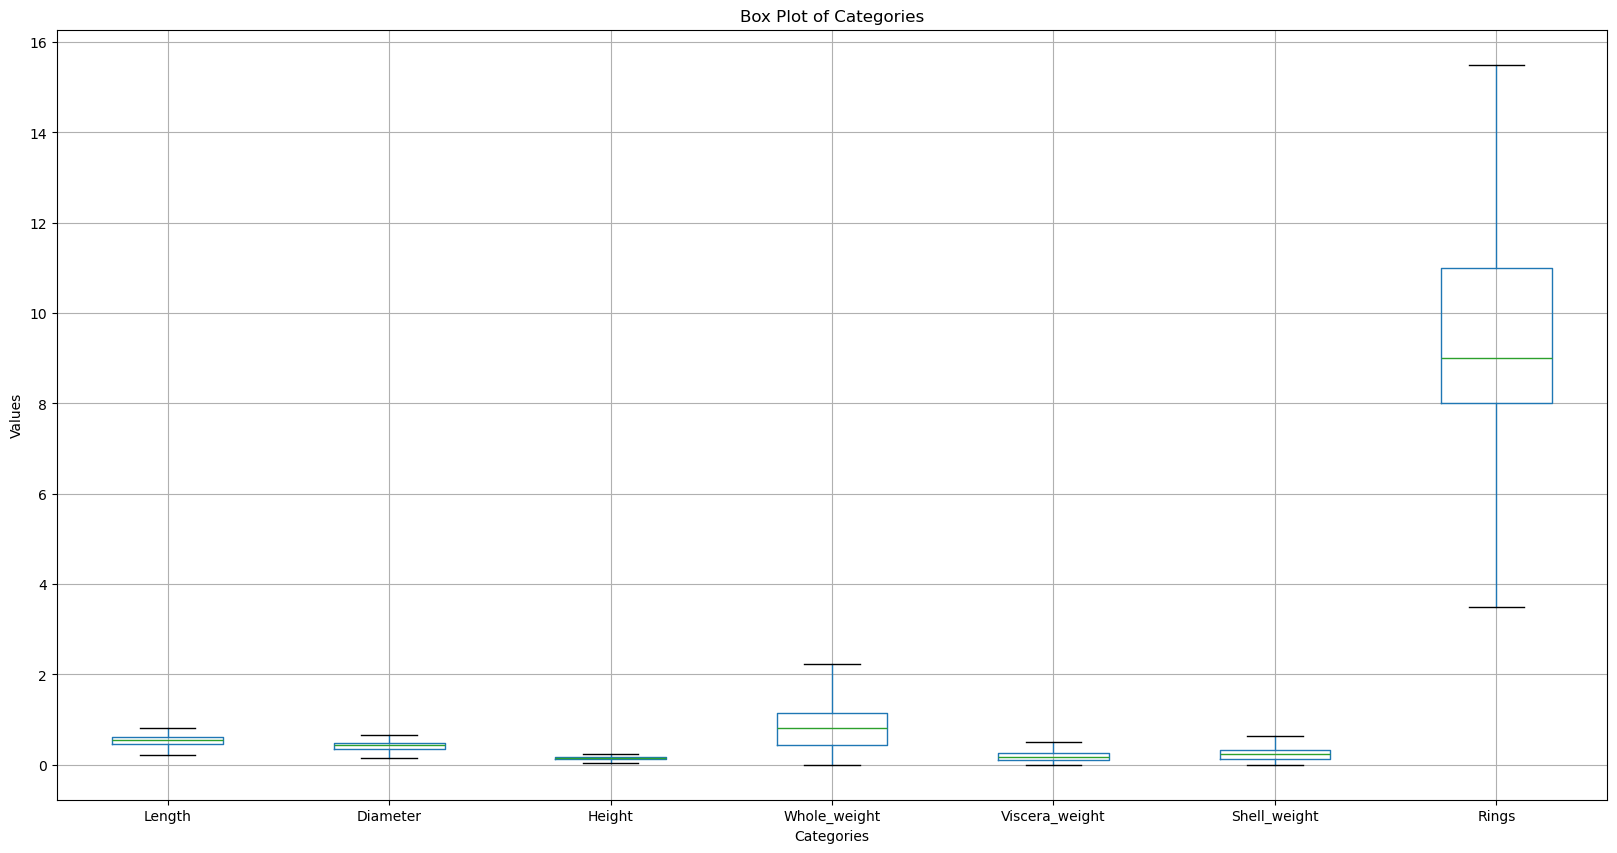

In [33]:
# Menampilkan boxplot setelah penggantian nilai outlier
plt.figure(figsize=(20, 10))
data.boxplot()
plt.title('Box Plot of Categories')
plt.ylabel('Values')
plt.xlabel('Categories')
plt.show()


In [35]:
# Memisahkan nilai target
data_copy = data.copy()
data.drop(columns='Rings')

,Length,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.2610,0.2960


In [37]:
# Melakukan normalisasi data feature menggunakan normalisasi l2
normalizer = Normalizer()
data = normalizer.fit_transform(data)
data

array([[0.03028987, 0.02429847, 0.00632426, ..., 0.00672369, 0.00998567,
        0.99856715],
       [0.04986842, 0.03775751, 0.01282331, ..., 0.00691034, 0.00997368,
        0.99736831],
       [0.05852943, 0.04638181, 0.01490844, ..., 0.01562625, 0.02319091,
        0.993896  ],
       ...,
       [0.06578404, 0.05207903, 0.02247621, ..., 0.03152152, 0.03376914,
        0.98676057],
       [0.06188361, 0.04802168, 0.01485207, ..., 0.0258426 , 0.02930808,
        0.99013775],
       [0.05815891, 0.04546225, 0.01597322, ..., 0.03084061, 0.04054741,
        0.98296755]])

In [39]:
# Mengembalikan nilai target ke data
# Mengembalikan format data menjadi data frame
column_names = ["Length", "Diameter", "Height", "Whole_weight", "Viscera_weight", "Shell_weight", "Rings"]
data = pd.DataFrame(data, columns=column_names)
data['Rings'] = data_copy['Rings']

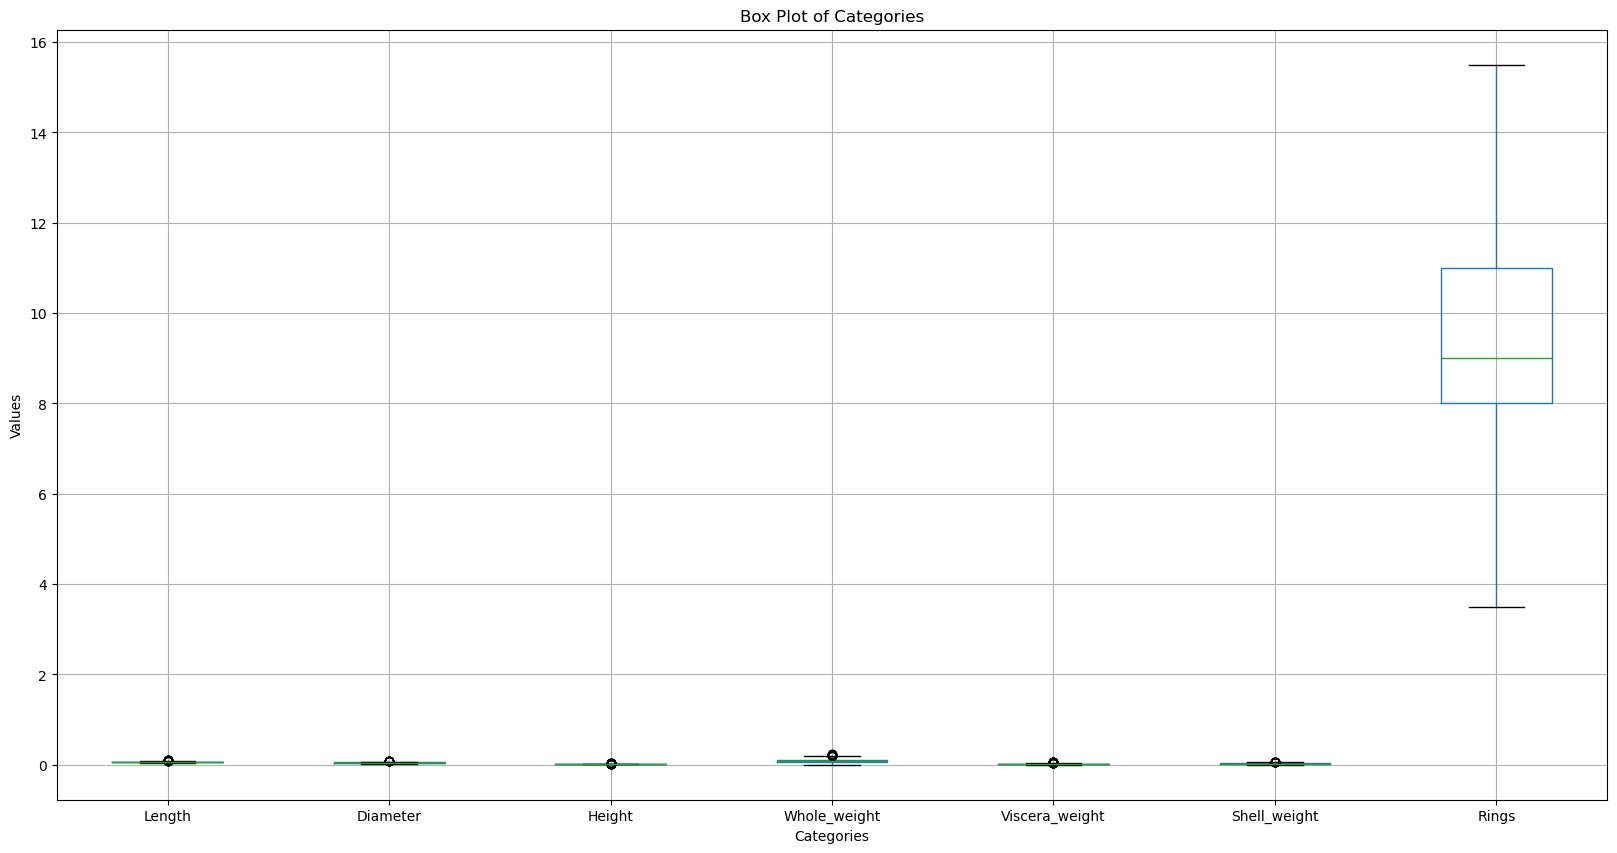

In [41]:
# Menampilkan boxplot setalah dilakukan normalisasi data
plt.figure(figsize=(20, 10))
data.boxplot()
plt.title('Box Plot of Categories')
plt.ylabel('Values')
plt.xlabel('Categories')
plt.show()

In [43]:
# Memastikan tidak ada missing value pada data sebelum masuk ke model
data.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

**Data Splitting**

In [46]:
# Fungsi untuk membagi data menjadi data train dan data test
def split_dataset(data, train_size):
    split_index = int(len(data)*train_size)
    data_train = data.iloc[:split_index]
    data_test = data.iloc[split_index:]

    return data_train, data_test

In [48]:
# Melakukan split data dengan data train size 80%
data_train, data_test = split_dataset(data, .8)

***Data tidak diacak karena data sudah bertipe numerik dan sudah terdistribusi dengan baik**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


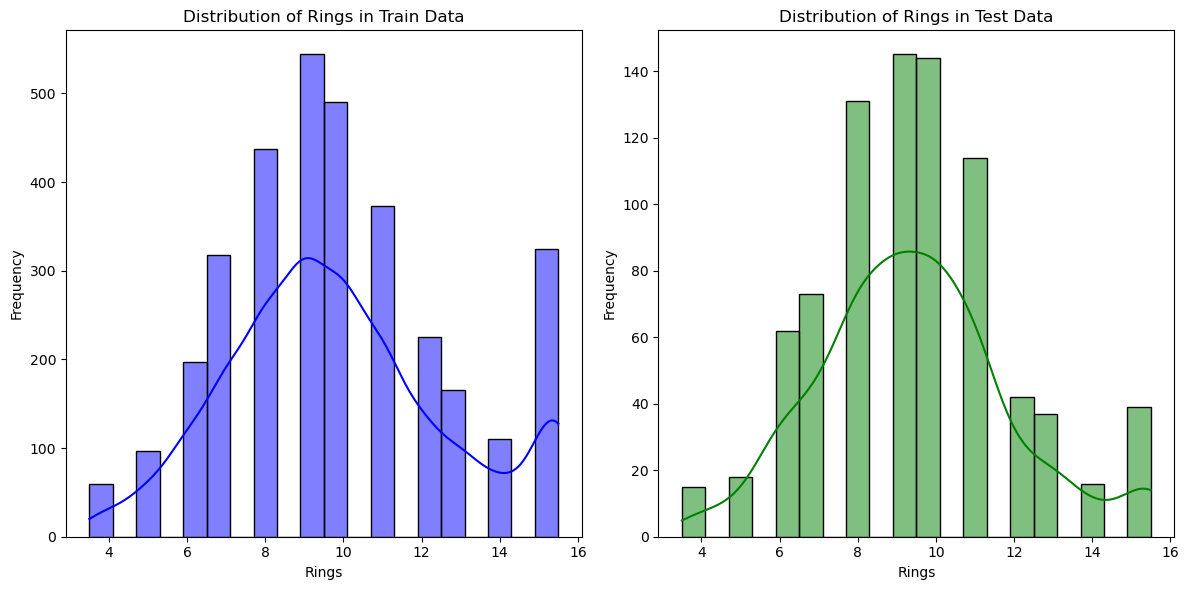

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_train['Rings'], kde=True, color='blue', bins=20)
plt.title('Distribution of Rings in Train Data')
plt.xlabel('Rings')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_test['Rings'], kde=True, color='green', bins=20)
plt.title('Distribution of Rings in Test Data')
plt.xlabel('Rings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
# Menampilkan data train yang dibagi
data_train

,Length,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight,Rings
0,0.030290,0.024298,0.006324,0.034218,0.006724,0.009986,15.0
1,0.049868,0.037758,0.012823,0.032130,0.006910,0.009974,7.0
2,0.058529,0.046382,0.014908,0.074763,0.015626,0.023191,9.0
3,0.043859,0.036383,0.012460,0.051434,0.011363,0.015450,10.0
4,0.047034,0.036345,0.011402,0.029218,0.005630,0.007839,7.0
...,...,...,...,...,...,...,...
3336,0.040814,0.031744,0.011337,0.040224,0.008163,0.013151,11.0
3337,0.043619,0.034697,0.011896,0.111922,0.026469,0.027758,15.0
3338,0.043818,0.033583,0.011194,0.109386,0.019766,0.037102,15.5
3339,0.048507,0.039386,0.015340,0.071103,0.014801,0.022803,12.0


In [55]:
# Menampilkan data test yang dibagi
data_test

,Length,Diameter,Height,Whole_weight,Viscera_weight,Shell_weight,Rings
3341,0.040719,0.032409,0.011219,0.049029,0.010388,0.015332,12.0
3342,0.030680,0.023545,0.006778,0.024259,0.006065,0.007991,14.0
3343,0.034946,0.028034,0.008449,0.029570,0.003533,0.010330,13.0
3344,0.037995,0.029168,0.011130,0.039530,0.007522,0.016273,13.0
3345,0.039887,0.031577,0.012049,0.049028,0.011717,0.019113,12.0
...,...,...,...,...,...,...,...
4172,0.051058,0.040665,0.014911,0.080156,0.021598,0.022501,11.0
4173,0.058532,0.043651,0.013393,0.095833,0.021280,0.025843,10.0
4174,0.065784,0.052079,0.022476,0.128937,0.031522,0.033769,9.0
4175,0.061884,0.048022,0.014852,0.108371,0.025843,0.029308,10.0


In [57]:
# Mengganti format data menjadi numpy array dimana index terakhir merupakan target
train_data = data_train.to_numpy()
test_data = data_test.to_numpy()

In [59]:
train_data

array([[3.02898701e-02, 2.42984673e-02, 6.32425860e-03, ...,
        6.72368546e-03, 9.98567148e-03, 1.50000000e+01],
       [4.98684154e-02, 3.77575145e-02, 1.28233068e-02, ...,
        6.91033756e-03, 9.97368308e-03, 7.00000000e+00],
       [5.85294311e-02, 4.63818133e-02, 1.49084400e-02, ...,
        1.56262538e-02, 2.31909067e-02, 9.00000000e+00],
       ...,
       [4.38183931e-02, 3.35834400e-02, 1.11944800e-02, ...,
        1.97662533e-02, 3.71017051e-02, 1.55000000e+01],
       [4.85072512e-02, 3.93862296e-02, 1.53398999e-02, ...,
        1.48009305e-02, 2.28025540e-02, 1.20000000e+01],
       [3.47260888e-02, 2.79737938e-02, 9.32459792e-03, ...,
        1.41476658e-02, 1.69771990e-02, 1.55000000e+01]])

In [61]:
test_data

array([[4.07192263e-02, 3.24091801e-02, 1.12185623e-02, ...,
        1.03875577e-02, 1.53320352e-02, 1.20000000e+01],
       [3.06800095e-02, 2.35451235e-02, 6.77814163e-03, ...,
        6.06465303e-03, 7.99107223e-03, 1.40000000e+01],
       [3.49461973e-02, 2.80337626e-02, 8.44853121e-03, ...,
        3.53302214e-03, 1.03302495e-02, 1.30000000e+01],
       ...,
       [6.57840378e-02, 5.20790300e-02, 2.24762129e-02, ...,
        3.15215181e-02, 3.37691394e-02, 9.00000000e+00],
       [6.18836095e-02, 4.80216810e-02, 1.48520663e-02, ...,
        2.58425953e-02, 2.93080775e-02, 1.00000000e+01],
       [5.81589132e-02, 4.54622491e-02, 1.59732226e-02, ...,
        3.08406068e-02, 4.05474113e-02, 1.20000000e+01]])

#### Metode yang Digunakan

Metode yang kami gunakan adalah menggunakan k-Nearest Neighbors Regression dengan parameter weight menggunakan distance euclidean dan akan dilakukan pencarian k yang optimal menggunakan elbow method

setelah menemukan parameter yang sesuai akan dilakukan k-Fold Cross-Validation untuk melihat apakah model yang digunakan dapat mengatasi data validation yang berbeda

lalu akan dilakukan model testing terhadap data test yang sudah dibagi diawal dan melakukan evaluasi perfomansi model

**Experiment Settings**

In [65]:
# Fungsi untuk menghitung jarak antar data
def evaluate_distance(known_data, unknown_data): # data train, data test
    distances = []
    for i in range(len(known_data)):
        sumValue = 0
        for j in range(len(known_data[i])):
            diff = (unknown_data[j] - known_data[i][j]) ** 2
            sumValue += diff
        distances.append(math.sqrt(sumValue))
    return distances

In [67]:
# Fungsi untuk prediksi nilai target pada test_data
# dengan menghitung jarak untuk setiap baris train_data
# Memilih data sebanyak K paling dekat dengan target train_data
# kemudian mengambil nilai rata-ratanya untuk dijadikan predicted value
def predict(train_data, test_data, kNeighbor):
    distances = evaluate_distance(train_data[:,0:-1], test_data[0:-1])
    distances_with_index = []
    for index, distance in enumerate(distances):
        distances_with_index.append((distance, index))
    sorted_distances = sorted(distances_with_index)
    sumValue = 0
    for distance_value, index in sorted_distances[0:kNeighbor]:
        sumValue += train_data[index][-1]
    predicted_value = sumValue/kNeighbor
    return predicted_value


In [69]:
# Fungsi untuk melakukan prediksi untuk setiap test_data
def build_model(X, y, neighbors):
    predictions = []
    for i in range(len(y)):
        predicted_value = predict(X, y[i], neighbors)
        predictions.append(predicted_value)
    return predictions

In [71]:
# Melakukan Elbow Method untuk mencari parameter neighbor terbaik
rmse_rates = []
r2_rates = []
k_values = range(1, 16)

for k in k_values:
    print(f'[+] using {k}-Neighbors to KNN...')
    predictions = build_model(train_data, test_data, k)
    r2 = r2_score(test_data[:,-1], np.array(predictions))
    rmse = np.sqrt(mean_squared_error(test_data[:,-1], np.array(predictions)))
    print(r2)
    print(rmse)

    rmse_rates.append(rmse)
    r2_rates.append(r2)

[+] using 1-Neighbors to KNN...
0.9097358993238127
0.7389537411631038
[+] using 2-Neighbors to KNN...
0.9283720252575053
0.6582654457961367
[+] using 3-Neighbors to KNN...
0.9349905138369629
0.6271163000601799
[+] using 4-Neighbors to KNN...
0.939253397196906
0.6062066834522702
[+] using 5-Neighbors to KNN...
0.941329323214374
0.5957585330191014
[+] using 6-Neighbors to KNN...
0.9431606397804841
0.5863869720762337
[+] using 7-Neighbors to KNN...
0.9440532866397019
0.581764225692401
[+] using 8-Neighbors to KNN...
0.9450401120300967
0.576610626500502
[+] using 9-Neighbors to KNN...
0.9446860350966994
0.5784650402777658
[+] using 10-Neighbors to KNN...
0.9451653003296381
0.575953546771159
[+] using 11-Neighbors to KNN...
0.9453147749938338
0.575168011221511
[+] using 12-Neighbors to KNN...
0.9454142900670058
0.5746444333215756
[+] using 13-Neighbors to KNN...
0.9451961065510267
0.5757917382331066
[+] using 14-Neighbors to KNN...
0.9448641341587407
0.5775330229843465
[+] using 15-Neighbor

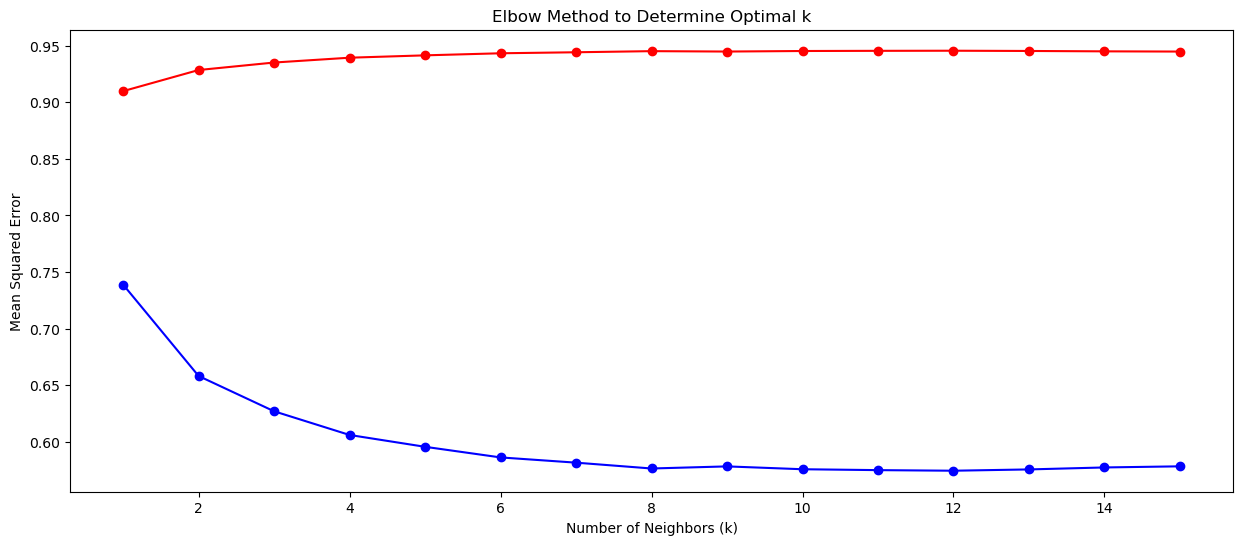

In [72]:
# Menampilkan scatter plot rmse dan r2 untuk melihat K-neighbors yang optimal
plt.figure(figsize=(15, 6))

plt.plot(k_values, rmse_rates, color='blue', marker='o')
plt.plot(k_values, r2_rates, color='red', marker='o')

plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')

plt.show()

**K-Fold Cross-Validation**


In [76]:
# Fungsi untuk menentukan index dari data training dan data validation
# untuk setiap fold
# untuk mengecek apakah model baik dalam menangani data yang bervariasi
def kfold_fit(train_data, fold):
  number_of_folds = fold
  number_per_fold = len(train_data) // number_of_folds
  fold_split_index = []

  indices = np.arange(len(train_data))

  for i in range(number_of_folds):
      start_index_val = number_per_fold * i
      end_index_val = start_index_val + number_per_fold

      if i == number_of_folds - 1:
          end_index_val = len(train_data)

      val_index = indices[start_index_val:end_index_val]
      mask = np.isin(indices, val_index, invert=True)
      train_index = indices[mask]

      fold_split_index.append((train_index, val_index))

  return fold_split_index

In [78]:
fold_split_index = kfold_fit(train_data, 5)
for train_index, val_index in fold_split_index:
  print(f"Val start index: {val_index.min()}\n")

Val start index: 0

Val start index: 668

Val start index: 1336

Val start index: 2004

Val start index: 2672



In [80]:
def kfold_predict(train_data, fold_split_index):
  total_rmse = 0
  total_r2 = 0
  neighbors = 8
  number_of_folds = 5
  for i, (train_index, val_index) in enumerate(fold_split_index):
      train_fold = train_data[train_index, :]
      val_fold = train_data[val_index, :]
      # Fit the model
      predictions = build_model(train_fold, val_fold, neighbors)
      r2 = r2_score(val_fold[:,-1], predictions)
      rmse = np.sqrt(mean_squared_error(val_fold[:,-1], predictions))
      total_r2 += r2
      total_rmse += rmse
      print(f'RMSE fold ke-{i + 1}: {rmse}')
      print(f'R2 fold ke-{i + 1}: {r2}')
  print('\nRata-rata RMSE:', total_rmse / number_of_folds)
  print('\nRata-rata R2:', total_r2 / number_of_folds)

In [82]:
fold_split_index = kfold_fit(train_data, 5)
kfold_predict(train_data, fold_split_index)

RMSE fold ke-1: 0.5961678630077551
R2 fold ke-1: 0.9665466066691653
RMSE fold ke-2: 0.5739896502879861
R2 fold ke-2: 0.952057298195196
RMSE fold ke-3: 0.6023351126649531
R2 fold ke-3: 0.9007493128343869
RMSE fold ke-4: 0.6084206310575005
R2 fold ke-4: 0.9619266240009792
RMSE fold ke-5: 0.5698275018927249
R2 fold ke-5: 0.9502952383287522

Rata-rata RMSE: 0.5901481517821839

Rata-rata R2: 0.9463150160056959


**Model Testing**

In [85]:
# Melakukan prediksi menggunakan K optimal
predictions = build_model(train_data, test_data, 8)

**Evaluation Performance**

In [88]:
r2 = r2_score(test_data[:,-1], np.array(predictions))
print('R2: ', r2)
mse = mean_squared_error(test_data[:,-1], np.array(predictions))
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

R2:  0.9450401120300967
MSE:  0.33247981459330145
RMSE:  0.576610626500502


In [90]:
pred_table = pd.DataFrame({
    'actual_age': test_data[:,-1],
    'predictions': predictions
})

In [92]:
pred_table

,actual_age,predictions
0,12.0,11.8750
1,14.0,12.5625
2,13.0,11.8750
3,13.0,12.6250
4,12.0,12.3750
...,...,...
831,11.0,10.6250
832,10.0,10.3750
833,9.0,9.2500
834,10.0,9.8750


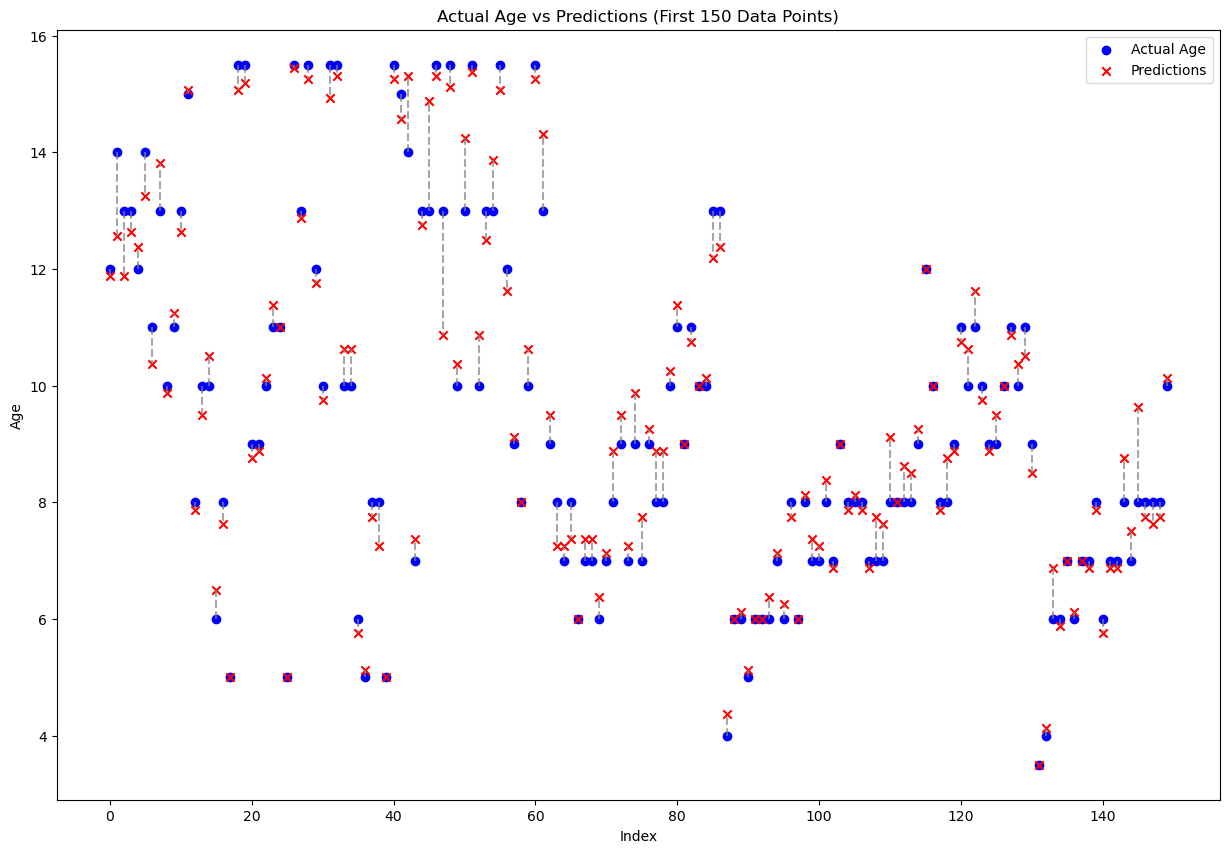

In [94]:
pred_100th = pred_table.head(150)
plt.figure(figsize=(15, 10))
plt.scatter(pred_100th.index, pred_100th['actual_age'], label='Actual Age', color='blue', marker='o')
plt.scatter(pred_100th.index, pred_100th['predictions'], label='Predictions', color='red', marker='x')
for i in range(len(pred_100th)):
    plt.plot([pred_100th.index[i], pred_100th.index[i]],
             [pred_100th['actual_age'].iloc[i], pred_100th['predictions'].iloc[i]],
             color='gray', linestyle='--', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Actual Age vs Predictions (First 150 Data Points)')
plt.legend()
plt.show()

#### Hasil dan Analisis


Dengan menggunakan model K-Nearest Neighbors Regression, pada model testing hasil prediksi yang dilakukan oleh model tersebut menunjukkan nilai evaluasi metriks yang bagus dengan nilai R2 adalah 0.94, MSE adalah 0.33, dan RMSE adalah 0.57.

Hasil ini juga dapat dilihat dari pred table yang menunjukkan bahwa nilai actual dan predictions tidak jauh berbeda dan dapat dilihat pada scatter plot yang telah ditunjukkan untuk 150 data prediksi pertama dengan error paling besar adalah ±2 yang mana untuk prediksi umur cukup dapat diterima.

Model ini juga dapat menangani nilai data train dan validation yang bervariasi yang mana dapat dilihat saat melakukan K-Fold Cross Validation dengan rata-rata R2 0.94 dan RMSE 0.59

#### Kesimpulan

Secara keseluruhan, hasil analisis ini menunjukkan bahwa model K-Nearest Neighbors Regression yang telah dibangun memiliki kinerja yang sangat baik dalam memprediksi nilai target pada data uji, dengan kemampuan untuk menangani variasi dalam data dan memberikan hasil prediksi yang baik. Meskipun model ini dapat dikatakan bagus, masih terdapat beberapa error pada prediksi.

Meskipun demikian, perlu dicatat bahwa error pada prediksi tersebut masih dapat diterima, terutama dalam konteks prediksi umur abalon.